In [1]:
import pandas as pd
from random import randrange
import numpy as np

In [28]:
from sklearn.utils import resample

In [25]:
def bootstrap(x, y, delta, B):

    T = len(x)   
    count = 0
    
    # Passo 0
    corr = x.corr(y, method = 'pearson')
    
    # Passo 8
    for k in range(B):
        
        x_ = pd.Series()
        y_ = pd.Series()

        # Passo 3
        while len(x_) < T:
            # Passo 1
            i = randrange(T - delta)

            # Passo 2
            bloco = x[i : i + delta - 1]
            x_ = pd.concat([x_, bloco])

        # Passo 6
        while len(y_) < T:
            # Passo 4
            j = randrange(T - delta)

            # Passo 5
            bloco = y[j : j + delta - 1]
            y_ = pd.concat([y_, bloco])

        # Passo 7
        corr_ = x_.corr(y_, method = 'pearson')

        # Passo 9_1
        if (abs(corr_) >= abs(corr)):
            count = count + 1
            
    # Passo 9_2
    p_value = count / float(B)
    
    return p_value

In [9]:
p_values = pd.Series()
for i in range(100):
    x, y = getSeries(300)
    p_values = p_values.append(pd.Series([bootstrap(x, y, 10, 300)]))

<ipython-input-2-5156c58d1343>:16: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  x_ = pd.Series()
<ipython-input-2-5156c58d1343>:17: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y_ = pd.Series()


In [12]:
boot = bootstrap(x, y, 20, 1000)

TypeError: '>' not supported between instances of 'list' and 'float'

In [41]:
def getSeries(size):
    
    x = np.random.normal(0,1,size)
    y = np.random.normal(0,1,size)

    for i in range(1, size):
        x[i] = np.random.normal(0,1,1)[0] + 0.5 * x[i - 1]
        y[i] = np.random.normal(0,1,1)[0] + 0.5 * y[i - 1]
        
    return pd.Series(x), pd.Series(y)

In [ ]:
p_values = []

In [53]:
B = 1000
N = 1000
C = 500

for j in range(C):
    print(f'{j}/{C}')
    correlations = []
    x, y = getSeries(N)
    corr = x.corr(y)
    for i in range(B):
        x_ = resample(x)
        y_ = resample(y)
        correlations = correlations + [x_.corr(y_)]

    p_value = sum(i > corr for i in correlations) / B
    p_values = p_values + [p_value]

0/500
1/500
2/500
3/500
4/500
5/500
6/500
7/500
8/500
9/500
10/500
11/500
12/500
13/500
14/500
15/500
16/500
17/500
18/500
19/500
20/500
21/500
22/500
23/500
24/500
25/500
26/500
27/500
28/500
29/500
30/500
31/500
32/500
33/500
34/500
35/500
36/500
37/500
38/500
39/500
40/500
41/500
42/500
43/500
44/500
45/500
46/500
47/500
48/500
49/500
50/500
51/500
52/500
53/500
54/500
55/500
56/500
57/500
58/500
59/500
60/500
61/500
62/500
63/500
64/500
65/500
66/500
67/500
68/500
69/500
70/500
71/500
72/500
73/500
74/500
75/500
76/500
77/500
78/500
79/500
80/500
81/500
82/500
83/500
84/500
85/500
86/500
87/500
88/500
89/500
90/500
91/500
92/500
93/500
94/500
95/500
96/500
97/500
98/500
99/500
100/500
101/500
102/500
103/500
104/500
105/500
106/500
107/500
108/500
109/500
110/500
111/500
112/500
113/500
114/500
115/500
116/500
117/500
118/500
119/500
120/500
121/500
122/500
123/500
124/500
125/500
126/500
127/500
128/500
129/500
130/500
131/500
132/500
133/500
134/500
135/500
136/500
137/500
138/50

<AxesSubplot:>

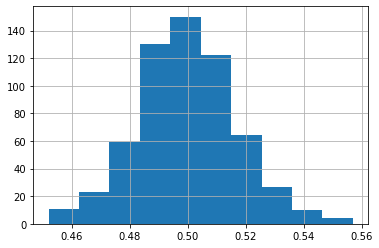

In [54]:
pd.Series(p_values).hist()